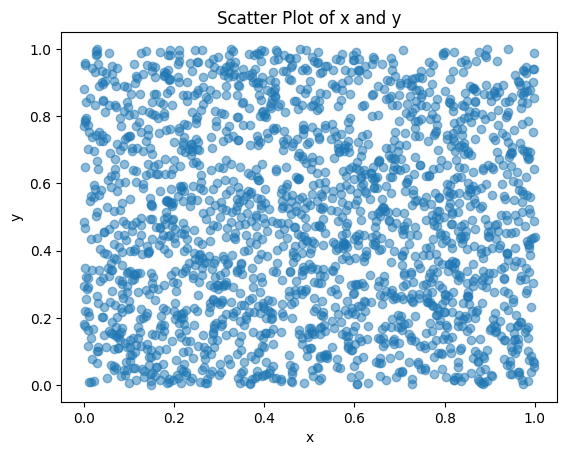

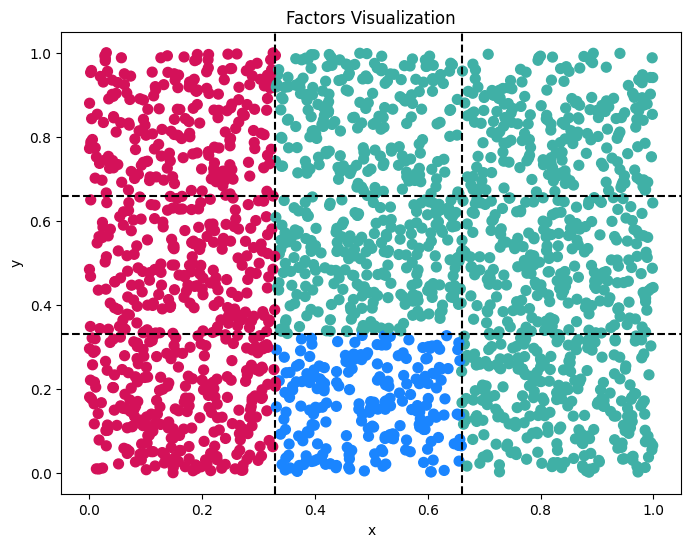

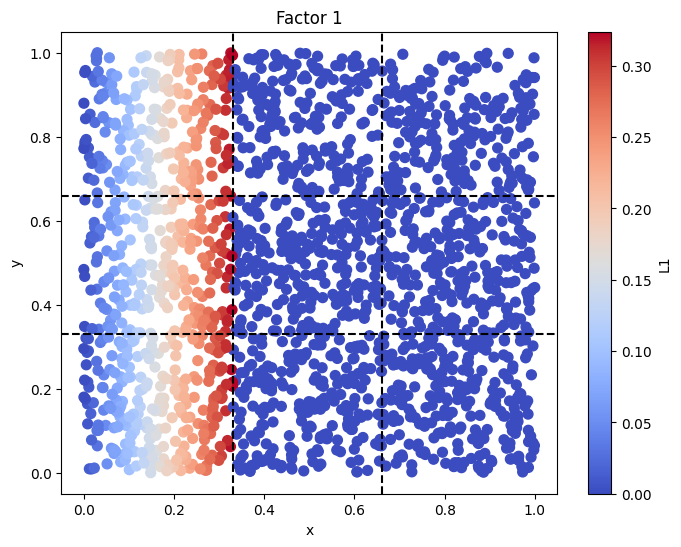

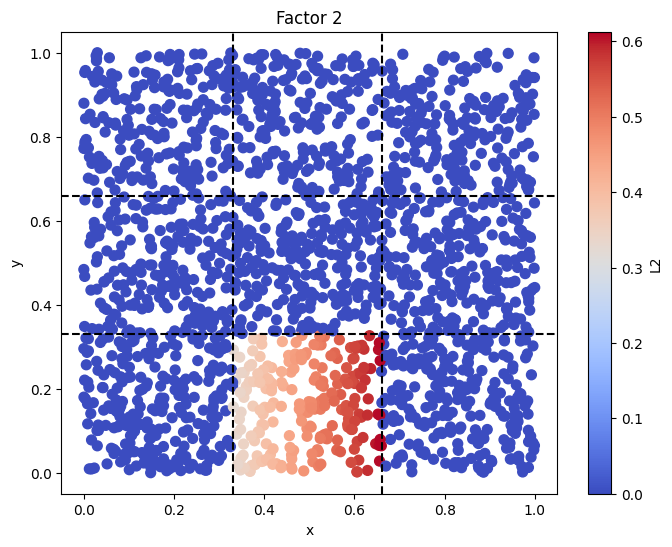

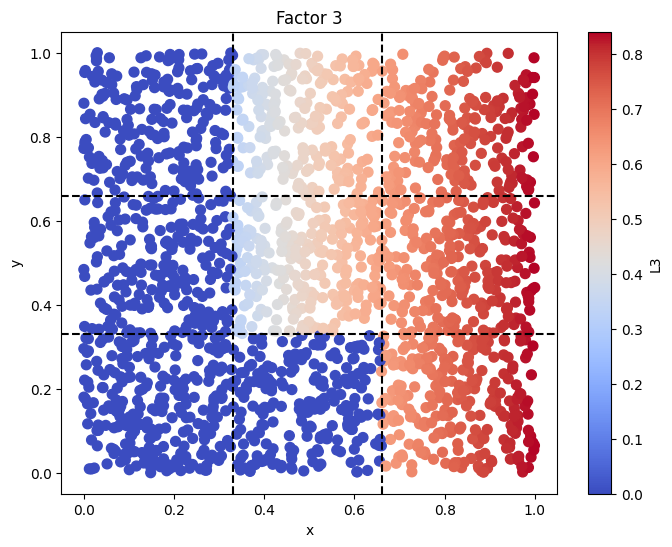

In [1]:
import torch
import matplotlib.pyplot as plt

# Reproducibility
torch.manual_seed(1)

# -------------------------
# 1) Random uniform data
# -------------------------
N = 2000
x = torch.rand(N)
y = torch.rand(N)
X = torch.stack([x, y], dim=1)  # (N,2)

# Scatter of x vs y
plt.scatter(x.numpy(), y.numpy(), alpha=0.5)
plt.xlabel("x"); plt.ylabel("y"); plt.title("Scatter Plot of x and y")
plt.show()

# -------------------------
# 2) Generate f (3 x 200)
#    f[0,i] ~ t1_i * N(0,1), f[1,i], f[2,i] ~ t2_i * N(0,1)
# -------------------------
M = 200
t1 = torch.randint(0, 2, (M,), dtype=torch.float32)  # 0/1
t2 = torch.randint(0, 2, (M,), dtype=torch.float32)  # 0/1

f0 = t1 * torch.randn(M)
f1 = t2 * torch.randn(M)
f2 = t2 * torch.randn(M)
f  = torch.stack([f0, f1, f2], dim=0)  # (3, M)

# -------------------------
# 3) Build L (N x 3) and factor labels
# -------------------------
L = torch.zeros(N, 3, dtype=torch.float32)

mask1 = x < 0.33
mask2 = (~mask1) & (x < 0.66) & (y < 0.33)
mask3 = ~(mask1 | mask2)

L[mask1, 0] = torch.sin(x[mask1])
L[mask2, 1] = torch.sin(x[mask2])
L[mask3, 2] = torch.sin(x[mask3])

factor = torch.zeros(N, dtype=torch.long)
factor[mask1] = 1
factor[mask2] = 2
factor[mask3] = 3

# -------------------------
# 4) Factor visualization
# -------------------------
colors = ["#D41159", "#1A85FF", "#40B0A6"]
color_map = {1: colors[0], 2: colors[1], 3: colors[2]}
point_colors = [color_map[int(k)] for k in factor.tolist()]

plt.figure(figsize=(8,6))
plt.scatter(x.numpy(), y.numpy(), c=point_colors, s=50)
for v in [0.33, 0.66]:
    plt.axhline(v, color="black", linestyle="--")
    plt.axvline(v, color="black", linestyle="--")
plt.title("Factors Visualization")
plt.xlabel("x"); plt.ylabel("y")
plt.show()

# -------------------------
# 5) Individual factor plots (L1, L2, L3 as color)
# -------------------------
for i in range(3):
    plt.figure(figsize=(8,6))
    plt.scatter(
        x.numpy(),
        y.numpy(),
        c=L[:, i].numpy(),
        cmap="coolwarm",
        s=50
    )
    for v in [0.33, 0.66]:
        plt.axhline(v, color="black", linestyle="--")
        plt.axvline(v, color="black", linestyle="--")
    plt.title(f"Factor {i+1}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.colorbar(label=f"L{i+1}")
    plt.show()

# -------------------------
# 6) Generate Z = L @ f + noise
# -------------------------
Z = L @ f + torch.randn(N, M) #* 2.5  # (N, M)


In [2]:
from cebmf_torch import cEBMF

In [3]:
mycebmf=  cEBMF(data=Z ) 
mycebmf.initialise_factors()
mycebmf.fit(10)

CEBMFResult(L=tensor([[-6.7598e+00, -1.4332e-02,  1.8322e+00,  7.3639e-09, -1.6797e-07],
        [-1.2728e-01, -8.6281e-02,  2.0286e+00,  6.0320e-08, -6.9689e-08],
        [-1.6566e+00, -1.5823e-02, -1.1584e-02, -3.5547e-08, -4.5247e-07],
        ...,
        [-6.3495e+00, -9.7502e-01,  1.8474e-02, -1.5775e-08,  5.1903e-07],
        [-1.1016e-01,  6.2751e-02,  2.8443e+00,  7.0512e-08, -1.3485e-08],
        [-9.9256e-02,  1.2566e-01,  1.3082e+00, -2.2849e-08,  6.4649e-08]]), F=tensor([[-1.3574e-01,  1.4970e-01, -8.4925e-02,  1.7957e-20, -9.2337e-20],
        [ 1.6497e-01,  1.4324e-01,  3.9473e-04,  6.2231e-22, -4.8134e-20],
        [-5.1115e-04, -6.7892e-04,  5.7604e-02,  1.2628e-20, -2.6076e-19],
        [-5.5547e-02,  1.2525e-01,  6.6623e-02, -6.9376e-20,  2.1516e-20],
        [ 1.5923e-05, -2.8374e-02,  6.6553e-02, -1.1059e-19, -7.3182e-20],
        [ 1.1018e-03,  1.7563e-03, -4.5966e-04,  6.2999e-21,  1.4008e-20],
        [-1.2125e-05, -9.3930e-03, -5.1896e-04, -1.2304e-19, -1.7499e

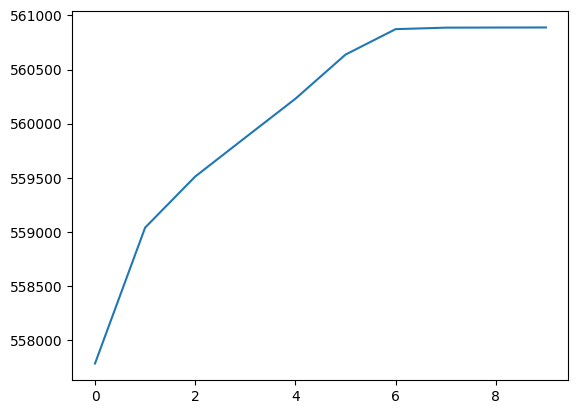

In [5]:
plt.plot(mycebmf.obj)
mycebmf._update_fitted_value()

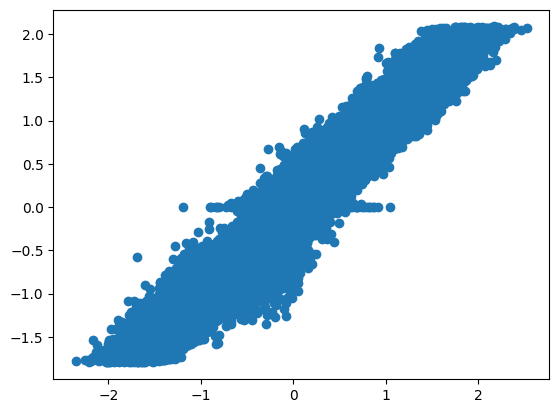

In [6]:
plt.scatter(mycebmf.Y_fit,L@f)

In [8]:
mycebmf1=  cEBMF(data=Z, X_l=X,
                 prior_L="cgb" ) 
mycebmf1.initialise_factors()
mycebmf1.fit(10)

[CGB] Epoch 10/50, Loss=3.3255, mu2=-0.153, sigma2=6.670
[CGB] Epoch 20/50, Loss=3.2845, mu2=-0.310, sigma2=6.251
[CGB] Epoch 30/50, Loss=3.2634, mu2=-0.470, sigma2=6.441
[CGB] Epoch 40/50, Loss=3.2326, mu2=-0.633, sigma2=5.851
[CGB] Epoch 50/50, Loss=3.2085, mu2=-0.798, sigma2=5.670
[CGB] Epoch 10/50, Loss=1.8552, mu2=-0.112, sigma2=5.181
[CGB] Epoch 20/50, Loss=1.7777, mu2=-0.223, sigma2=3.959
[CGB] Epoch 30/50, Loss=1.7541, mu2=-0.348, sigma2=4.395
[CGB] Epoch 40/50, Loss=1.7450, mu2=-0.484, sigma2=3.756
[CGB] Epoch 50/50, Loss=1.7420, mu2=-0.629, sigma2=4.324
[CGB] Epoch 10/50, Loss=2.0187, mu2=0.110, sigma2=2.868
[CGB] Epoch 20/50, Loss=1.9650, mu2=0.243, sigma2=2.831
[CGB] Epoch 30/50, Loss=1.9067, mu2=0.395, sigma2=2.614
[CGB] Epoch 40/50, Loss=1.8914, mu2=0.556, sigma2=2.628
[CGB] Epoch 50/50, Loss=1.8767, mu2=0.727, sigma2=2.084
[CGB] Epoch 10/50, Loss=1.7726, mu2=-0.011, sigma2=1.528
[CGB] Epoch 20/50, Loss=1.7746, mu2=-0.021, sigma2=2.249
[CGB] Epoch 30/50, Loss=1.7748, mu2=

CEBMFResult(L=tensor([[-6.7304e+00, -4.0446e-07,  0.0000e+00],
        [-1.3180e-04, -1.0210e-07,  1.5263e+00],
        [-1.2924e+00,  0.0000e+00, -4.3584e-06],
        ...,
        [-6.3433e+00,  0.0000e+00,  0.0000e+00],
        [-3.2766e-05,  3.0959e-05,  1.9158e+00],
        [-4.7520e-06,  9.9694e-05,  1.0389e+00]]), F=tensor([[-1.3767e-01,  1.7177e-01, -1.5296e-01],
        [ 1.6869e-01,  1.7231e-01,  2.1563e-03],
        [-4.7517e-04, -1.1219e-03,  5.6346e-02],
        [-5.6525e-02,  1.4147e-01,  1.1628e-01],
        [ 1.2754e-05, -4.0165e-02,  1.1502e-01],
        [ 1.0266e-03,  3.0845e-03, -2.8253e-04],
        [-2.6255e-05, -1.4802e-02, -1.7598e-03],
        [-1.9580e-01,  1.7349e-01,  6.6906e-03],
        [-2.4338e-05, -1.4506e-05, -1.4114e-01],
        [-8.6451e-02,  2.7881e-01,  1.9394e-02],
        [-1.0541e-01,  7.0263e-02,  2.2864e-01],
        [ 9.9941e-02,  1.5060e-01,  1.3908e-02],
        [-2.3037e-04, -6.8730e-04, -1.9911e-01],
        [ 1.0234e-03,  1.2799e-03,  3.

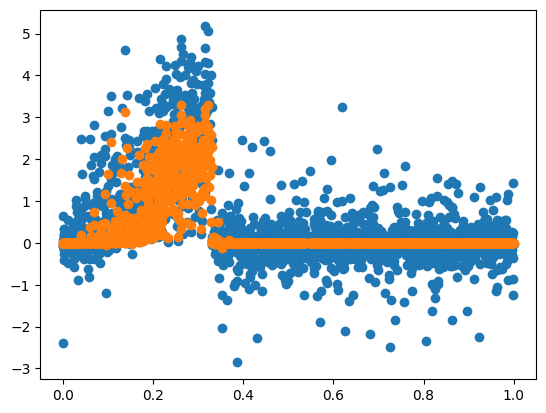

In [9]:
k=2
plt.scatter(x, mycebmf.L[:,k] )
plt.scatter( x,mycebmf1.L[:,k] )

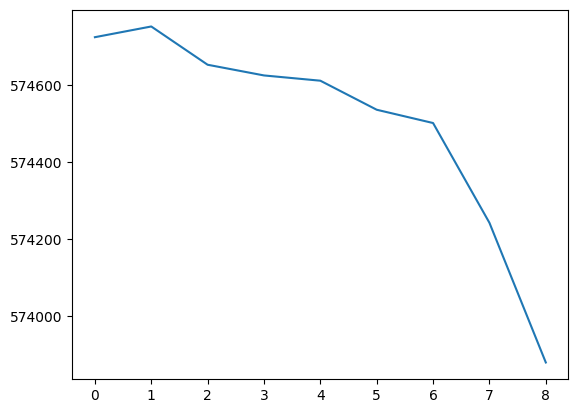

In [11]:
plt.plot(mycebmf1.obj)
mycebmf1._update_fitted_value()

tensor(0.0087)
tensor(0.0064)


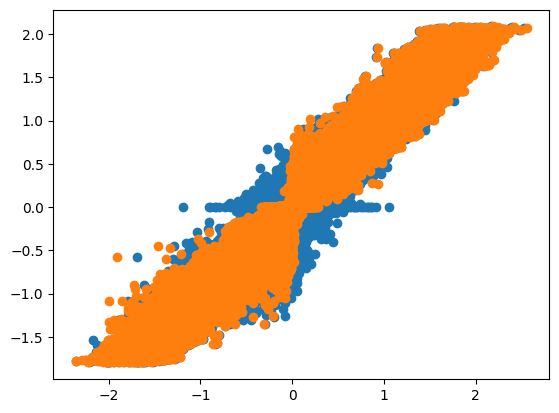

In [12]:
plt.scatter(mycebmf.Y_fit,L@f)
plt.scatter(mycebmf1.Y_fit,L@f)
print(torch.mean((mycebmf.Y_fit-L@f).pow(2)))

print(torch.mean((mycebmf1.Y_fit-L@f).pow(2)))

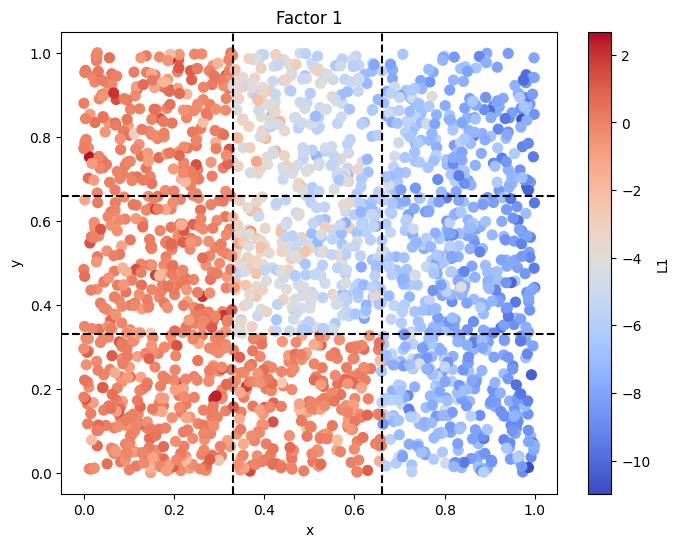

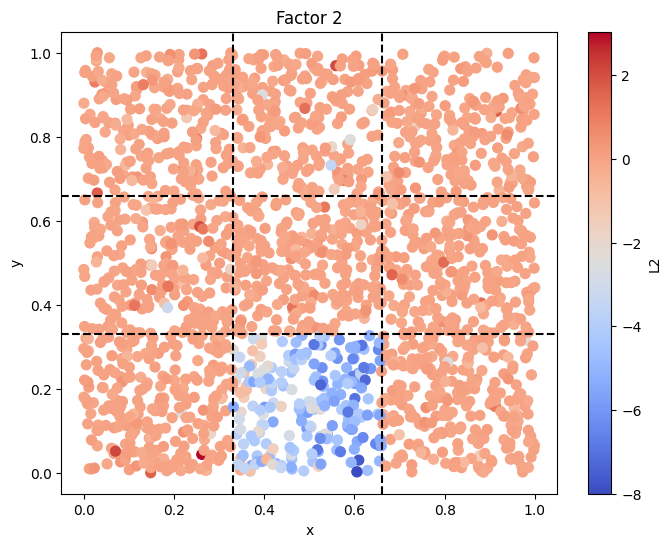

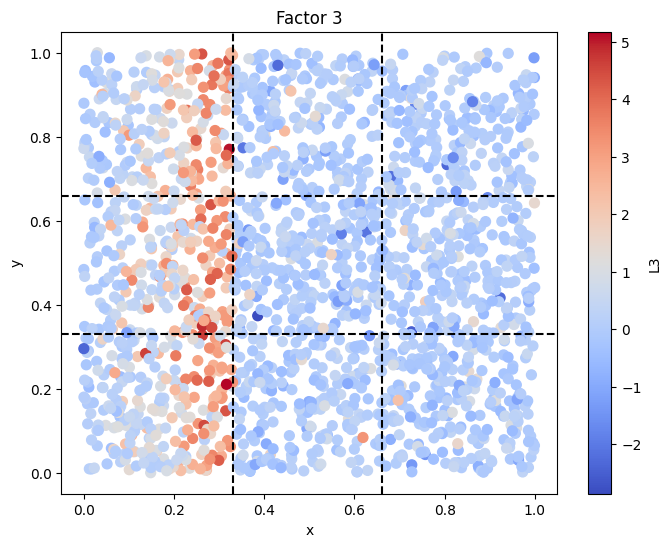

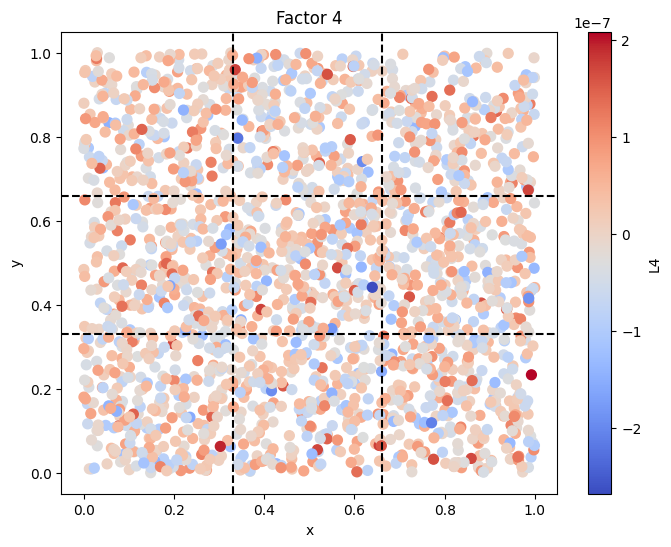

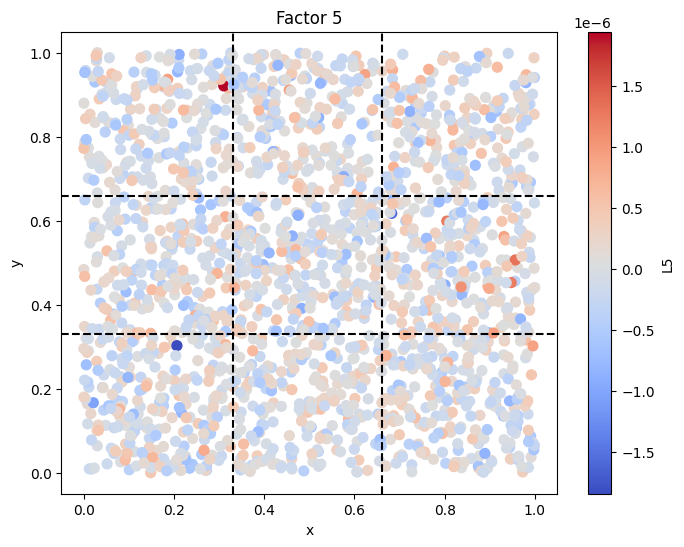

In [13]:
for i in range(5):
    plt.figure(figsize=(8,6))
    plt.scatter(
        x.numpy(),
        y.numpy(),
        c=mycebmf.L[:, i].numpy(),
        cmap="coolwarm",
        s=50
    )
    for v in [0.33, 0.66]:
        plt.axhline(v, color="black", linestyle="--")
        plt.axvline(v, color="black", linestyle="--")
    plt.title(f"Factor {i+1}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.colorbar(label=f"L{i+1}")
    plt.show()


In [14]:
mycebmf1.L

tensor([[-6.7304e+00, -4.0446e-07,  0.0000e+00],
        [-1.3180e-04, -1.0210e-07,  1.5263e+00],
        [-1.2924e+00,  0.0000e+00, -4.3584e-06],
        ...,
        [-6.3433e+00,  0.0000e+00,  0.0000e+00],
        [-3.2766e-05,  3.0959e-05,  1.9158e+00],
        [-4.7520e-06,  9.9694e-05,  1.0389e+00]])

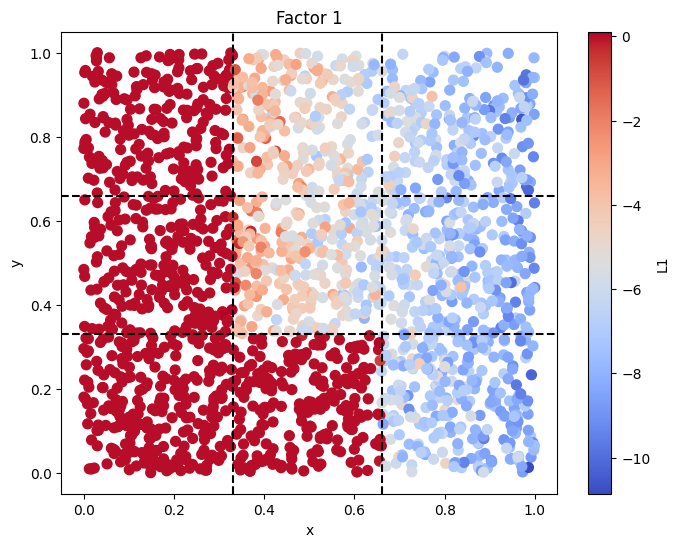

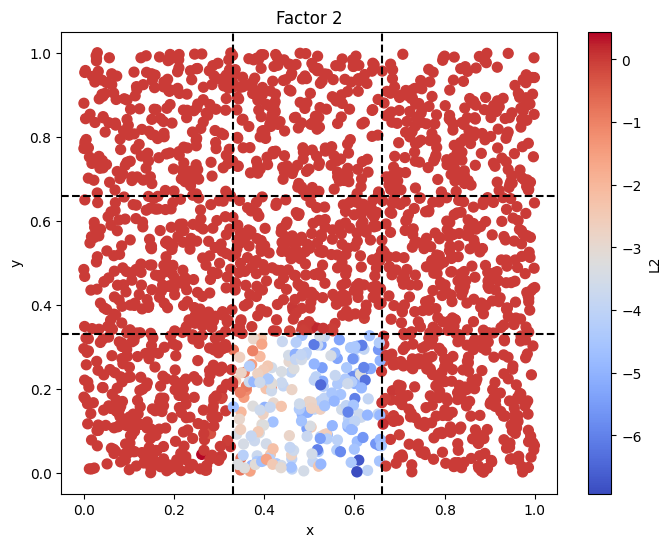

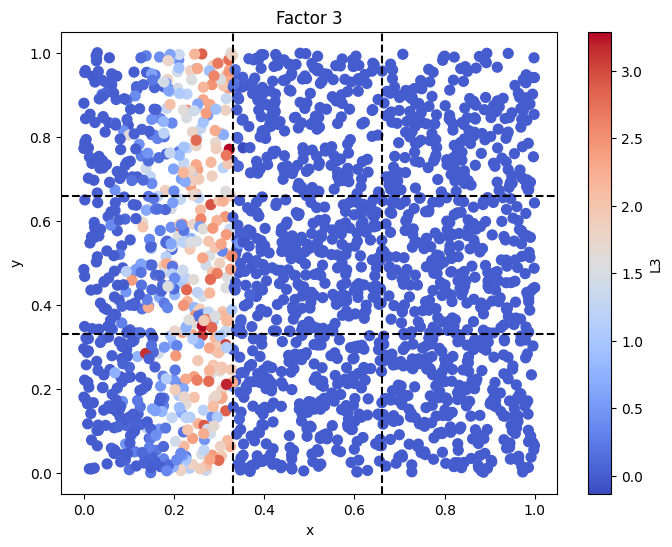

In [15]:
for i in range(3):
    plt.figure(figsize=(8,6))
    plt.scatter(
        x.numpy(),
        y.numpy(),
        c=mycebmf1.L[:, i].numpy(),
        cmap="coolwarm",
        s=50
    )
    for v in [0.33, 0.66]:
        plt.axhline(v, color="black", linestyle="--")
        plt.axvline(v, color="black", linestyle="--")
    plt.title(f"Factor {i+1}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.colorbar(label=f"L{i+1}")
    plt.show()
